TP FINAL_D'ippolito Ezequiel_dni: 46437648
#Analisis de inmigrantes a Barcelona (2015, 2016 y 2017) "immigrants_by_nationality.csv"
[fuente del dataset](https://www.kaggle.com/datasets/xvivancos/barcelona-data-sets/data)

Importamos todas las librerías necesarias para el análisis

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

importamos el dataframe

In [4]:
df = pd.read_csv("/content/immigrants_by_nationality.csv")

leemos el data frame

In [5]:
df

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Nationality,Number
0,2017,1,Ciutat Vella,1,el Raval,Spain,1109
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Spain,482
2,2017,1,Ciutat Vella,3,la Barceloneta,Spain,414
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Spain,537
4,2017,2,Eixample,5,el Fort Pienc,Spain,663
...,...,...,...,...,...,...,...
35219,2015,10,Sant Martí,70,el Besòs i el Maresme,No information,0
35220,2015,10,Sant Martí,71,Provençals del Poblenou,No information,0
35221,2015,10,Sant Martí,72,Sant Martí de Provençals,No information,0
35222,2015,10,Sant Martí,73,la Verneda i la Pau,No information,1


Vemos cuáles son las columnas que tiene el df(dataframe)

In [7]:
print(df.columns)

Index(['Year', 'District Code', 'District Name', 'Neighborhood Code',
       'Neighborhood Name', 'Nationality', 'Number'],
      dtype='object')


se agrupan los valores totales de inmigrantes y se grafica con barras para comparar entre años el volumen de personas que ingresan a Barcelona

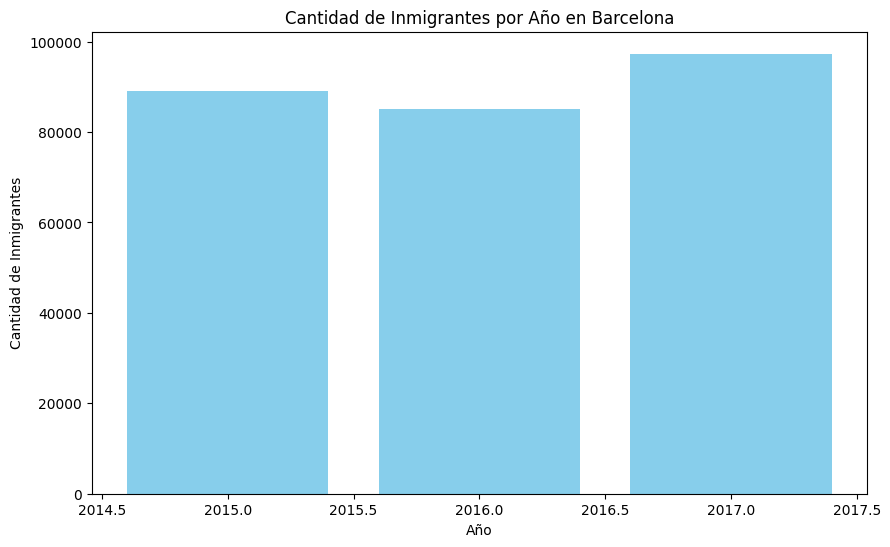

In [6]:
immigrants_by_year = df.groupby('Year')['Number'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(immigrants_by_year['Year'], immigrants_by_year['Number'], color='skyblue')
plt.xlabel('Año')
plt.ylabel('Cantidad de Inmigrantes')
plt.title('Cantidad de Inmigrantes por Año en Barcelona')
plt.show()

Mismo gráfico de barras, pero esta vez separa por color, la cantidad de gente que fue a cada barrio específico

<Figure size 1200x800 with 0 Axes>

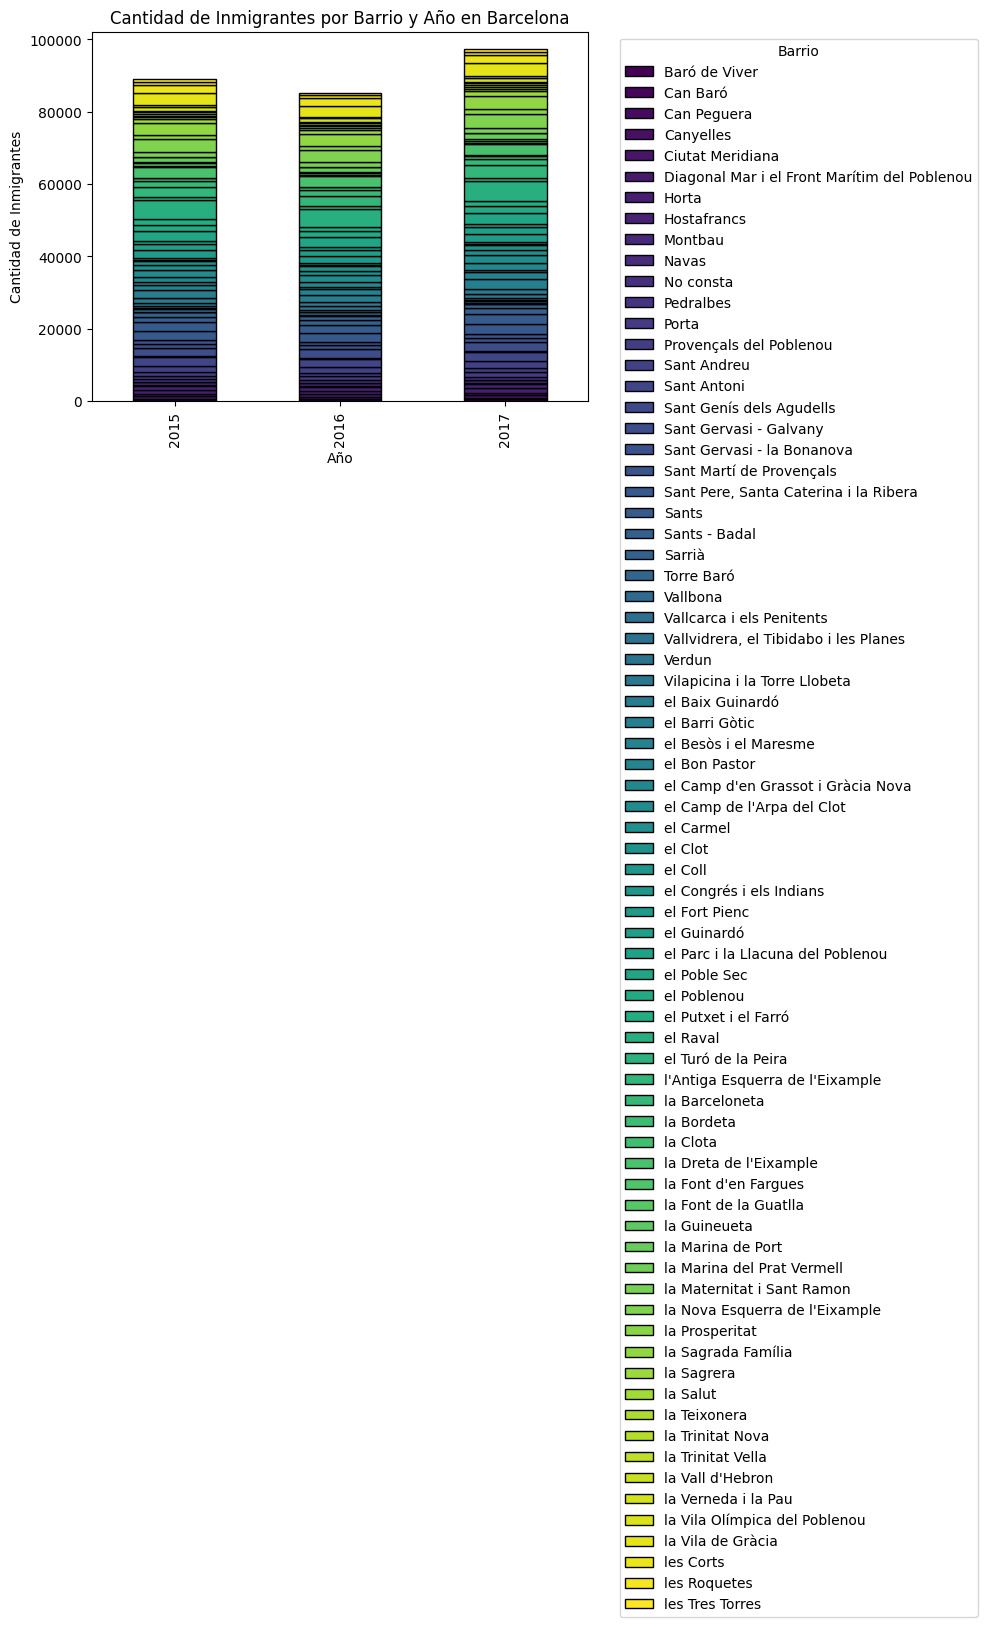

In [8]:
plt.figure(figsize=(12, 8))
df.pivot_table(index='Year', columns='Neighborhood Name', values='Number', aggfunc='sum').plot(kind='bar', stacked=True, colormap='viridis', edgecolor='black')
plt.xlabel('Año')
plt.ylabel('Cantidad de Inmigrantes')
plt.title('Cantidad de Inmigrantes por Barrio y Año en Barcelona')
plt.legend(title='Barrio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

basándonos en el gráfico anterior, averiguamos cuál barrio fue el que más inmigrantes recibió

In [10]:
df_2017 = df[df['Year'] == 2017]
df_2016 = df[df['Year'] == 2016]
df_2015 = df[df['Year'] == 2015]

barrio_mas_inmigrantes_2017 = df_2017.loc[df_2017['Number'].idxmax(), 'Neighborhood Name']
barrio_mas_inmigrantes_2016 = df_2016.loc[df_2016['Number'].idxmax(), 'Neighborhood Name']
barrio_mas_inmigrantes_2015 = df_2015.loc[df_2015['Number'].idxmax(), 'Neighborhood Name']

print(f"El barrio con la mayor cantidad de inmigrantes en 2017 fue: {barrio_mas_inmigrantes_2017}")
print(f"El barrio con la mayor cantidad de inmigrantes en 2016 fue: {barrio_mas_inmigrantes_2016}")
print(f"El barrio con la mayor cantidad de inmigrantes en 2015 fue: {barrio_mas_inmigrantes_2015}")

El barrio con la mayor cantidad de inmigrantes en 2017 fue: la Nova Esquerra de l'Eixample
El barrio con la mayor cantidad de inmigrantes en 2016 fue: la Nova Esquerra de l'Eixample
El barrio con la mayor cantidad de inmigrantes en 2015 fue: la Nova Esquerra de l'Eixample


Creación de gráfico de torta, para ver en porcentajes la distribución total de las distintas nacionalidades (se usa .sum para hacer la sumatoria total de inmigrantes y en base a eso sacar los porcentajes)

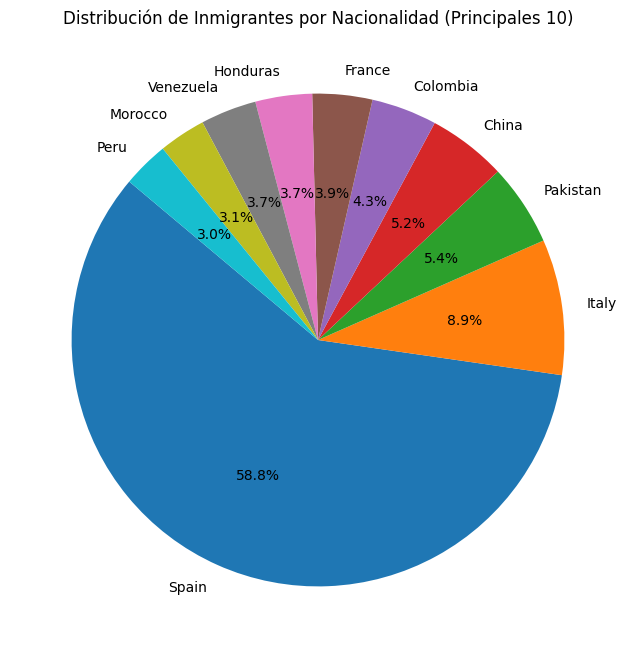

In [11]:
nacionalidades_totales = df.groupby('Nationality')['Number'].sum()

nacionalidades_principales = nacionalidades_totales.nlargest(10)

plt.figure(figsize=(10, 8))
plt.pie(nacionalidades_principales, labels=nacionalidades_principales.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Inmigrantes por Nacionalidad (Principales 10)')
plt.show()

importamos colormaps para ver las diferentes opciones de personalización de colores de la librería matplotlib (agregue # porque ya sé qué color voy a usar y no necesito la lista desplegada totalmente)

In [21]:
from matplotlib import colormaps
#list(colormaps)

averiguamos que nacionalidad fue la que menos emigro



In [12]:
nacionalidades_totales = df.groupby('Nationality')['Number'].sum()

nacionalidad_menos_emigracion = nacionalidades_totales.idxmin()
cantidad_menos_emigracion = nacionalidades_totales.min()

print(f"La nacionalidad que menos emigró en total es {nacionalidad_menos_emigracion} con {cantidad_menos_emigracion} inmigrantes.")

La nacionalidad que menos emigró en total es Antigua and Barbuda con 1 inmigrantes.


limpiamos el dataset de esa variable y comprobamos

In [13]:
df = df[(df['Nationality'] != 'Antigua and Barbuda') | (df['Number'] > 1)]

print(df[df['Nationality'] == 'Antigua and Barbuda'])

Empty DataFrame
Columns: [Year, District Code, District Name, Neighborhood Code, Neighborhood Name, Nationality, Number]
Index: []


gráfico de caja para encontrar outliers (filtrado solo para España e Italia que fueron los que más emigraron a Barcelona)

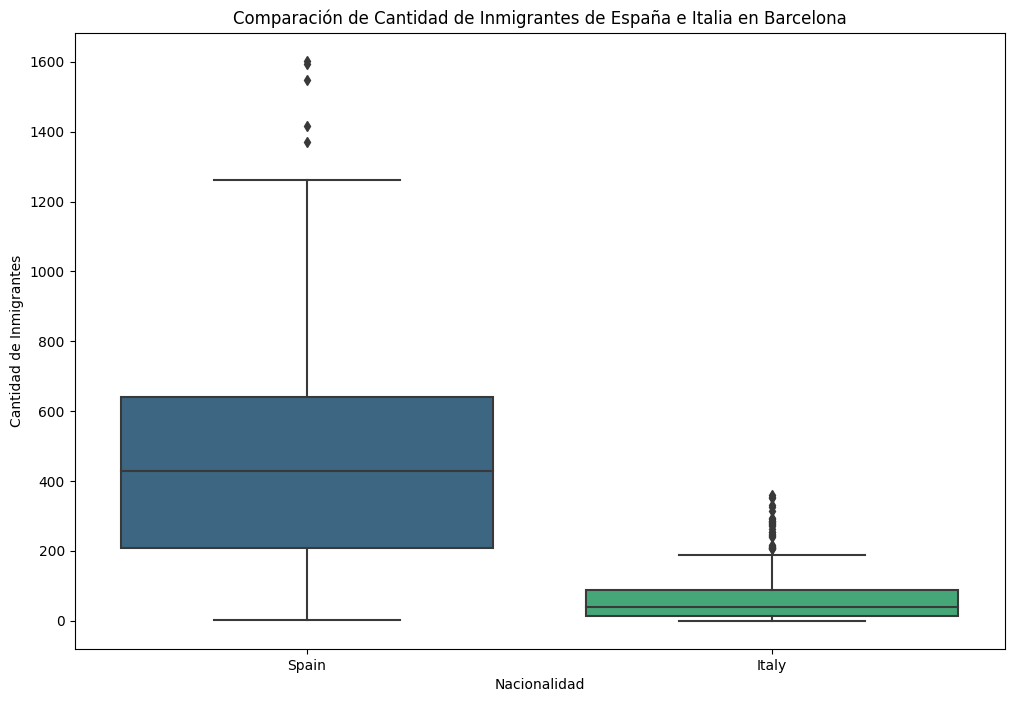

In [14]:
# Filtra el DataFrame para las nacionalidades de España e Italia
df_e_i = df[df['Nationality'].isin(['Spain', 'Italy'])]

# Crea un gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.boxplot(x='Nationality', y='Number', data=df_e_i, palette='viridis')
plt.xlabel('Nacionalidad')
plt.ylabel('Cantidad de Inmigrantes')
plt.title('Comparación de Cantidad de Inmigrantes de España e Italia en Barcelona')
plt.show()

Eliminación de outliers y gráfica de caja otra vez. La eliminación se usa filtrando usando los rangos inter cuartiles Q1 (percentil 25) hasta Q3 (percentil 75)

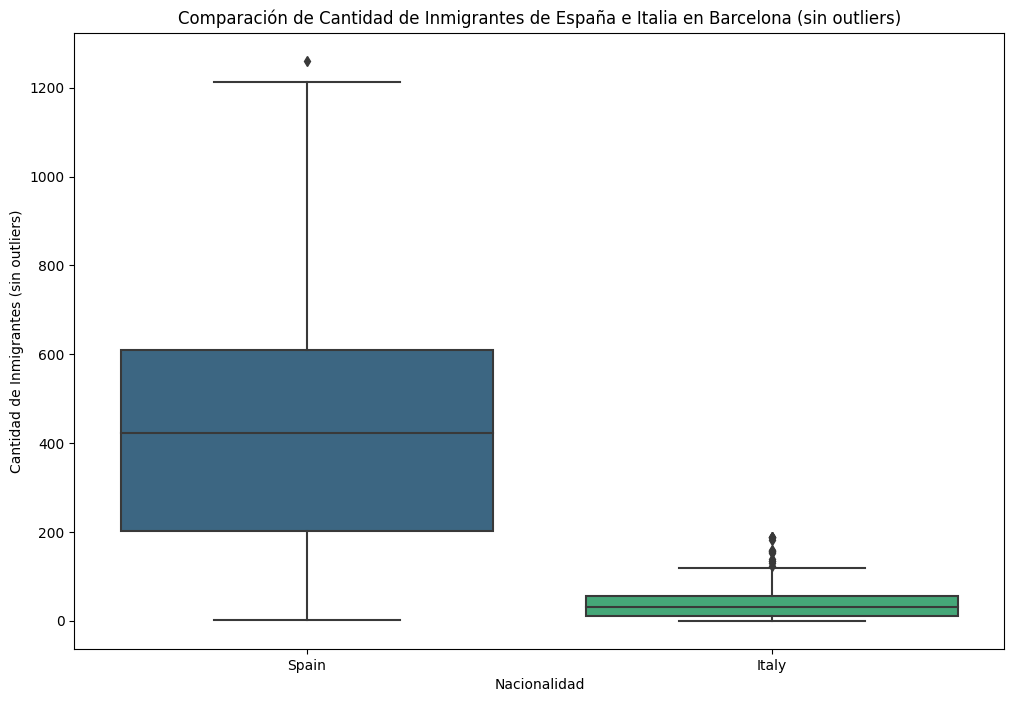

In [24]:
Q1 = df_e_i.groupby('Nationality')['Number'].quantile(0.25)
Q3 = df_e_i.groupby('Nationality')['Number'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_sin_outliers = df_e_i[(df_e_i['Number'] >= lower_bound[df_e_i['Nationality']].values) &
                         (df_e_i['Number'] <= upper_bound[df_e_i['Nationality']].values)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Nationality', y='Number', data=df_sin_outliers, palette='viridis')
plt.xlabel('Nacionalidad')
plt.ylabel('Cantidad de Inmigrantes (sin outliers)')
plt.title('Comparación de Cantidad de Inmigrantes de España e Italia en Barcelona (sin outliers)')
plt.show()

Se saca la media de inmigrantes españoles e italianos en el barrio que más inmigrantes recibió

In [18]:
df_leixample = df_e_i[df_e_i['Neighborhood Name'] == 'el Fort Pienc']


df_españoles_leixample = df_leixample[df_leixample['Nationality'] == 'Spain']
df_italianos_leixample = df_leixample[df_leixample['Nationality'] == 'Italy']


media_españoles_leixample_año = df_españoles_leixample.groupby('Year')['Number'].mean()
media_italianos_leixample_año = df_italianos_leixample.groupby('Year')['Number'].mean()

print("Media de inmigrantes españoles por año:")
print(media_españoles_leixample_año)
print("Media de inmigrantes italianos por año:")
print(media_italianos_leixample_año)

Media de inmigrantes españoles por año:
Year
2015    717.0
2016    642.0
2017    663.0
Name: Number, dtype: float64
Media de inmigrantes italianos por año:
Year
2015    138.0
2016    188.0
2017    207.0
Name: Number, dtype: float64


Copia del df original para evitar corromperlo, pasan las columnas a datos números y se hace una matriz de correlación, se puede que ver que por la naturaleza de los datos y el formato original de este dataset, no se ve a simple vista una correlación

<ipython-input-19-037d06fea093>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_alternativo.corr()


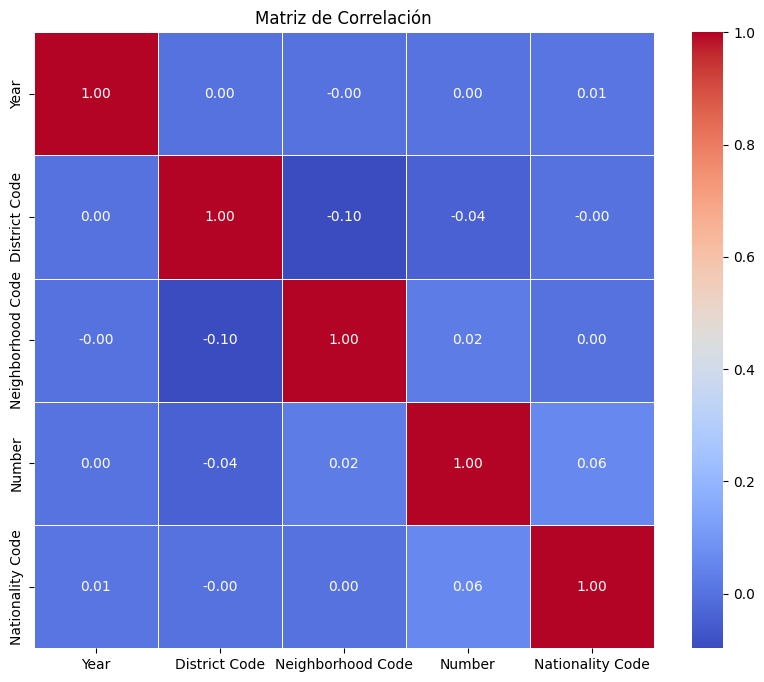

In [19]:
df_alternativo = df.copy()

df_alternativo['District Code'] = df_alternativo['District Name'].astype('category').cat.codes
df_alternativo['Neighborhood Code'] = df_alternativo['Neighborhood Name'].astype('category').cat.codes
df_alternativo['Nationality Code'] = df_alternativo['Nationality'].astype('category').cat.codes

correlation_matrix = df_alternativo.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

#Hipotesis:
Podemos decir que en el pasado, el grueso de inmigrantes fue de nacionalidad española, seguida por la italiana y esa tendencia se va a mantener en el futuro

--------------------------------------

vamos a intentar predecir con un modelo de regresión lineal la variable "Amount" o sea la cantidad de inmigrantes (Españoles) para eso hacemos un gráfico de regresión lineal con seaborn, lo que aparece en un azul más claro es toda la zona en la que la recta puede variar sin afectar mucho la predicción

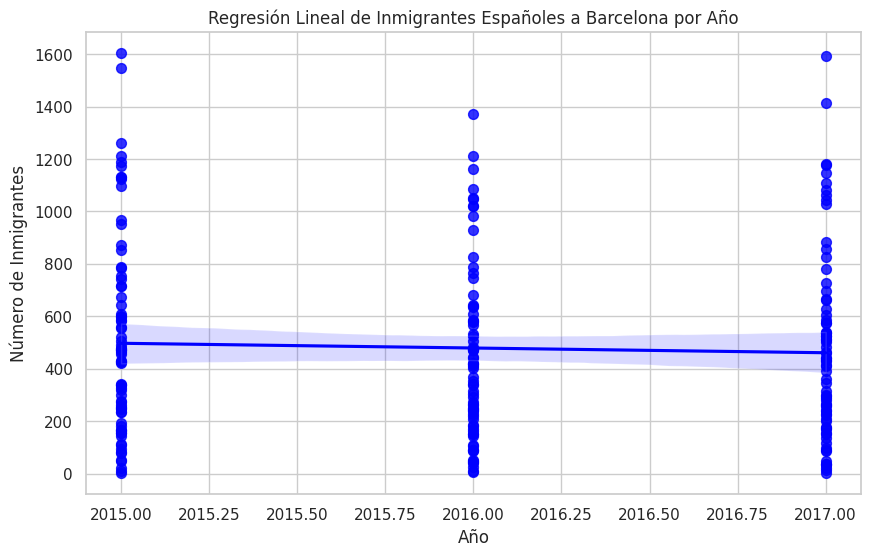

In [30]:
df_españoles = df[df['Nationality'] == 'Spain']

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
regplot = sns.regplot(x='Year', y='Number', data=df_españoles, scatter_kws={'s': 50}, color='blue')

plt.title('Regresión Lineal de Inmigrantes Españoles a Barcelona por Año')
plt.xlabel('Año')
plt.ylabel('Número de Inmigrantes')
plt.show()

Como no es una variable continua, ya que va por intervalos hay que usar "x_estimator=np" (el np es porque estamos usando la libreria numpy). También se puede ver como esta vez los intervalos de confianza se ensanchan mucho más, mostrando que hay una mayor incertidumbre en la estimación del modelo de regresión. O sea

Si el intervalo de confianza es más amplio, indica que hay más variabilidad o dispersión en los datos alrededor de la línea de regresión

<Axes: xlabel='Year', ylabel='Number'>

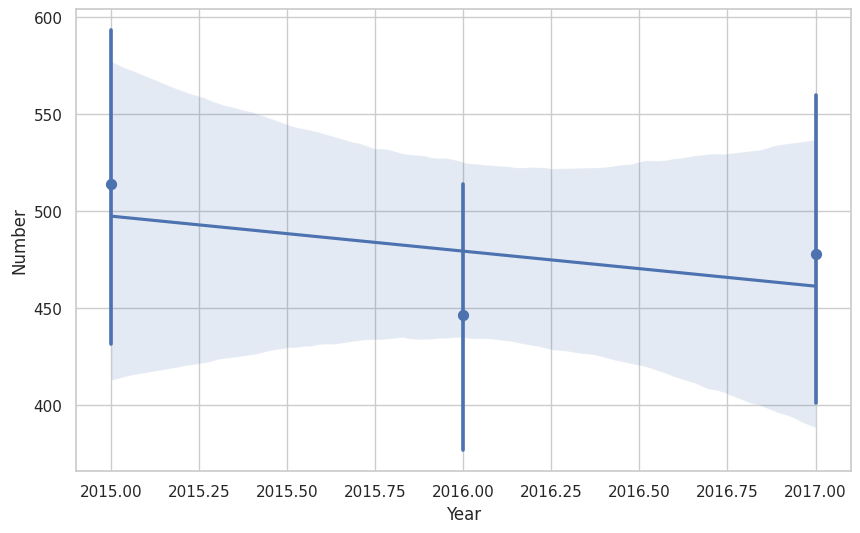

In [31]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Year',y='Number',data=df_españoles,x_estimator=np.mean)

se crea el modelo de predicción lineal, importe la librería sklearn.linear_model, ya que hacía el trabajo automáticamente y con este gráfico se logra predecir aproximadamente y tomando como supuesto el comportamiento lineal de la variable objetivo, un aproximado en los migrantes en 2018

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


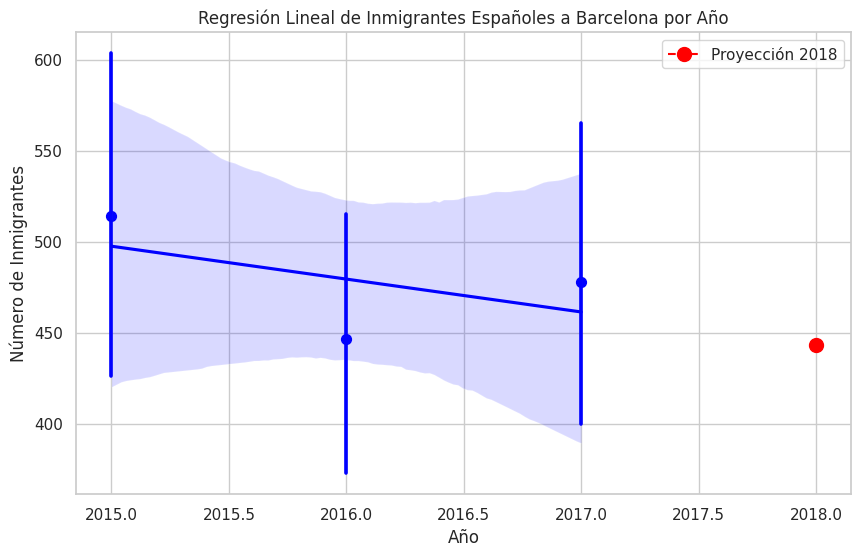

In [34]:
from sklearn.linear_model import LinearRegression

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
regplot = sns.regplot(x='Year', y='Number', data=df_españoles, scatter_kws={'s': 50}, color='blue', x_estimator=np.mean)

X = df_españoles[['Year']]
y = df_españoles['Number']
model = LinearRegression().fit(X, y)

projection_years = np.array([2018])
predicted_values = model.predict(projection_years.reshape(-1, 1))
plt.plot(projection_years, predicted_values, marker='o', linestyle='dashed', color='red', markersize=10, label='Proyección 2018')

plt.title('Regresión Lineal de Inmigrantes Españoles a Barcelona por Año')
plt.xlabel('Año')
plt.ylabel('Número de Inmigrantes')
plt.legend()
plt.show()

Como conclusión final, si miramos el gráfico de migrantes totales, podemos decir que el número va en aumento, pero si tomamos a los migrantes españoles (que son la mayoría según el gráfico de torta) podemos ver que según la predicción lineal, el número va en descenso